
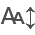

In [39]:
import pandas as pd
import numpy as np
import re
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

In [40]:
df = pd.read_csv('stock_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10587 entries, 0 to 10586
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       10587 non-null  object
 1   post_id    10587 non-null  object
 2   subreddit  10587 non-null  object
 3   title      10587 non-null  object
 4   author     10587 non-null  object
 5   url        920 non-null    object
 6   score      10587 non-null  int64 
 7   body       10422 non-null  object
dtypes: int64(1), object(7)
memory usage: 661.8+ KB


In [41]:
# drop rows where the body is NaN
df = df.dropna(subset=['body'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10422 entries, 0 to 10586
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       10422 non-null  object
 1   post_id    10422 non-null  object
 2   subreddit  10422 non-null  object
 3   title      10422 non-null  object
 4   author     10422 non-null  object
 5   url        755 non-null    object
 6   score      10422 non-null  int64 
 7   body       10422 non-null  object
dtypes: int64(1), object(7)
memory usage: 732.8+ KB


In [42]:
# if url is NaN, replace it with an empty string
df['url'] = df['url'].fillna('')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10422 entries, 0 to 10586
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       10422 non-null  object
 1   post_id    10422 non-null  object
 2   subreddit  10422 non-null  object
 3   title      10422 non-null  object
 4   author     10422 non-null  object
 5   url        10422 non-null  object
 6   score      10422 non-null  int64 
 7   body       10422 non-null  object
dtypes: int64(1), object(7)
memory usage: 732.8+ KB


In [43]:
# check for "[deleted]" in all columns and print the rows
for column in df.columns:
    if df[column].dtype == 'object':
        mask_deleted = df[column].str.contains(r'\[deleted\]', na=False)
        if mask_deleted.any():
            print(f"Column '{column}' contains '[deleted]':")
        else:
            print(f"Column '{column}' does not contain '[deleted]'.")

        mask_removed = df[column].str.contains(r'\[removed\]', na=False)
        if mask_removed.any():
            print(f"Column '{column}' contains '[removed]':")
        else:
            print(f"Column '{column}' does not contain '[removed]'.")
    else:
        print(f"Column '{column}' is not of type 'object'.")

Column 'type' does not contain '[deleted]'.
Column 'type' does not contain '[removed]'.
Column 'post_id' does not contain '[deleted]'.
Column 'post_id' does not contain '[removed]'.
Column 'subreddit' does not contain '[deleted]'.
Column 'subreddit' does not contain '[removed]'.
Column 'title' does not contain '[deleted]'.
Column 'title' does not contain '[removed]'.
Column 'author' contains '[deleted]':
Column 'author' does not contain '[removed]'.
Column 'url' does not contain '[deleted]'.
Column 'url' does not contain '[removed]'.
Column 'score' is not of type 'object'.
Column 'body' contains '[deleted]':
Column 'body' contains '[removed]':


In [44]:
# check if the rows containing deleted or removed are comments or posts
mask_deleted = df['body'].str.contains(r'\[deleted\]', na=False)
mask_removed = df['body'].str.contains(r'\[removed\]', na=False)

df_with_mask = df[mask_deleted | mask_removed]
df_with_mask['type'].value_counts()

type
comment    188
Name: count, dtype: int64

In [45]:
# since they are all comments, no choice but to delete them
df = df[~mask_deleted & ~mask_removed]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10234 entries, 0 to 10585
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       10234 non-null  object
 1   post_id    10234 non-null  object
 2   subreddit  10234 non-null  object
 3   title      10234 non-null  object
 4   author     10234 non-null  object
 5   url        10234 non-null  object
 6   score      10234 non-null  int64 
 7   body       10234 non-null  object
dtypes: int64(1), object(7)
memory usage: 719.6+ KB


In [46]:
def remove_bad_chars(text):
    text = re.sub(r"(https|http)?:\/\/(\w|\.|/|\?|=|&|%|-)*\b|\\n\\n|\\'", '', text, flags=re.MULTILINE|re.IGNORECASE)
    return text

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & pictographs
        "\U0001F680-\U0001F6FF"  # Transport & map symbols
        "\U0001F700-\U0001F77F"  # Alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols, etc.
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['cleaned_body'] = df['body'].apply(remove_bad_chars)
df['cleaned_body'] = df['cleaned_body'].apply(remove_emojis)
df.to_csv('cleaned_stock_data.csv', index=False)

In [47]:
df['cleaned_body']

0        Please use this thread to discuss your portfol...
1                              100% 6-month tbills, lol :)
2                                 100% S&P and bricking it
3        |Ticker|Company|Allocation|\n|:-|:-|:-|\n|ACGL...
4        Ticker & %\n\nSPGI: 18.2%\n\nASML: 15.2%\n\nGO...
                               ...                        
10581                                     Just beautiful!!
10582    What a fucking absolute legend. Can I give him...
10583    this is cool but i hope people don't lose focu...
10584    Oh man this rocket is gonna fucking take off o...
10585    This right here ladies, non gender conformists...
Name: cleaned_body, Length: 10234, dtype: object